## Image Multi-Class Classification Problem

**Team: 10**

* Josue Perez Gomez 1
* Joshua Pauly 2

**Course:** DAAN 897 - Deep Learning (Spring II, 2023)

### Problem Statement

* This project aims at building a deep learning based model that is capable to solve an image multi-class classification problem using the data set from an Intel Image Classification Challenge from 2018. In this project we explore some image manipulation and analyis. Along side the use of convolutional neural netowrk as the deep learning based model solution to our problem. The data consists of 24k images labeled as building, forest, glacier, mountain, sea, and street. We then we are going to show how we create our model solution.

* **Keywords:** Image Multi-Class Classification, convolutional neural network, image classification, image analysis, deep learning. 

### Data Collection
* Source(url): https://www.kaggle.com/datasets/puneet6060/intel-image-classification
* Short Description: The data set of images from pictures taken from different natural scenery from an Intel Image Classification Challenge from 2018

* Keywords: Images, Natural Scenery, Buildings and Streets.

### Required Packages
* !pip install imageio
* !pip install scikit-image

Additional Commmon Packages
* Numpy
* re 
* Pandas
* os
* matplotlib
* Tensorflow
* Seaborn
* Sckitlearn
* skimage
* PIL
* 
*
*
*

# 1 - Data Preprocessing

In [ ]:
!pip install imageio
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 4.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Getting the Data 

- Create a function to get the path for al the images in order. 

In [ ]:
import numpy as np
import re
import os


def get_sort_dir(path):
    sample = os.listdir(path)
    num_sample = np.array(list(map(lambda x: re.findall(r'\d+', x), sample)))
    int_sample = list(map(lambda x: int(x), num_sample))
    int_sample = list(np.sort(int_sample))   
    new_list = list(map(lambda x: path + '/' + str(x)+'.jpg', int_sample))
    return new_list


- We call the created function to get all the paths strings for all the images for all the categories in the train data folder

In [ ]:
from skimage import data, color
from skimage.transform import rescale, resize
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL.Image
import PIL
import os

buildings_dir = "train/buildings"
forest_dir = "train/forest"
glacier_dir = "train/glacier"
mountain_dir = "train/mountain"
sea_dir = "train/sea"
street_dir = "train/street"


buildings_path = list()
forest_path = list()
glacier_path = list()
mountain_path = list()
sea_path = list()
street_path = list()

buildings_path = get_sort_dir(buildings_dir)
forest_path = get_sort_dir(forest_dir)
glacier_path = get_sort_dir(glacier_dir)
mountain_path = get_sort_dir(mountain_dir)
sea_path = get_sort_dir(sea_dir)
street_path = get_sort_dir(street_dir)



2023-12-08 21:03:55.737525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-08 21:03:55.974136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-08 21:03:55.974207: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-08 21:03:56.039936: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-08 21:03:58.294428: W tensorflow/stream_executor/platform/de

- Example of an image being printed out and some basic information about it.

train/buildings/32.jpg


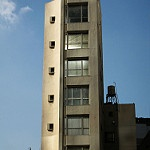

In [ ]:
print(buildings_path[15])
PIL.Image.open(str(buildings_path[15]))

In [ ]:
from matplotlib import image as mpimg
import numpy as np
image = mpimg.imread('train/buildings/32.jpg')
print('type(image): ', type(image))
print('type(image): ', type(np.array(image)))
print('image.shape: ', image.shape)


type(image):  <class 'numpy.ndarray'>
type(image):  <class 'numpy.ndarray'>
image.shape:  (150, 150, 3)


### Data Dimension Analysis on Buildings Data

- Here we read the images as numpy arrays, we analyze the distribution of dimension and some simple stats and a bar plot

['(150, 150, 3)', '(124, 150, 3)']
Min: (124, 150, 3)
CumSum:  2122
Min_100:  124


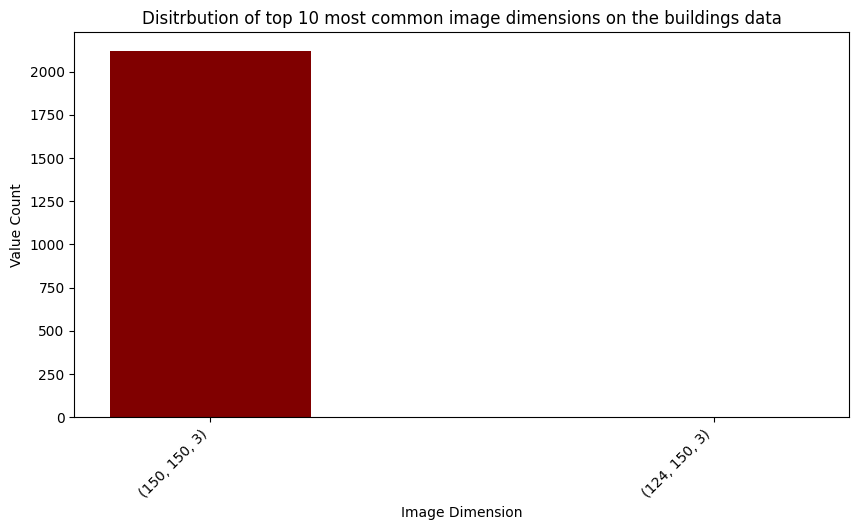

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
buildings_dimensions = list()
buildings_images = list()
for i in range(len(buildings_path)):
    image = mpimg.imread(buildings_path[i])
    dim = np.array(image).shape
    buildings_dimensions.append(dim)    
    buildings_images.append(np.array(image))
buildings_dim_count = pd.DataFrame(pd.value_counts(buildings_dimensions), columns=['count'])

buildings_dim_x = np.array(buildings_dim_count['count'])
buildings_dim_labels = list(map(lambda x: str(x), buildings_dim_count.index))
print(buildings_dim_labels)

print("Min:", min(buildings_dimensions))
print("CumSum: ", sum(buildings_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], buildings_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(buildings_dim_labels[:20], buildings_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the buildings data")
plt.show()





### Getting the Images That have a Dimension of 150 x 150 

- Here we get the images that have a dimension of 150 by 150 pixels as a form of data normalization

In [ ]:
# We can view data coverage based on width and height shape constrains. 
sample = re.findall(r'\d+', str(buildings_dimensions[0]))[0]
print(sample)

buildings_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), buildings_dimensions))
print(sum(np.array(buildings_dim_) >= 150))  

buildings_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), buildings_dimensions))
print(sum(np.array(buildings_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_buildings = np.array(buildings_images)[np.array(buildings_dim_) >= 150]
print(new_buildings[0].shape)
print(new_buildings.shape)
print(len(new_buildings))
print(type(new_buildings))


150
2122
2121
(150, 150, 3)
(2121,)
2121
<class 'numpy.ndarray'>
/tmp/ipykernel_40/3150839923.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_buildings = np.array(buildings_images)[np.array(buildings_dim_) >= 150]


### Correlation Analysis on the Building Data

- Here we compute multiple statistical calculations on the images to see if there is a correlation between these statistical calculations using a correlation table. All on the images from the building class of the training data

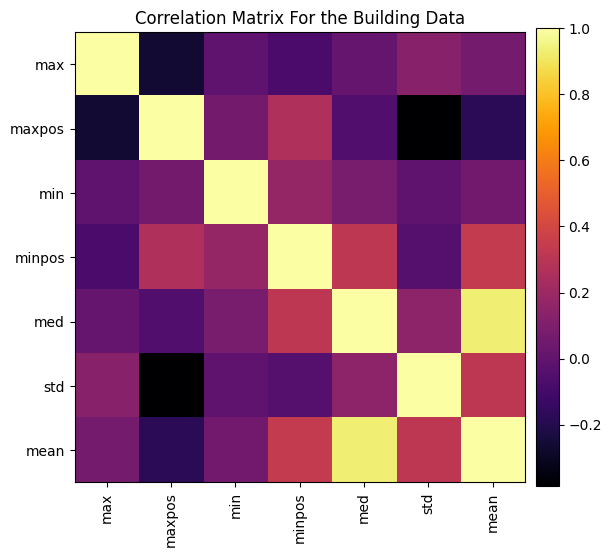

In [ ]:
import pandas as pd
buildings_max = [np.max(np.array(x)) for x in new_buildings]
buildings_maxpos = [np.argmax(np.array(x)) for x in new_buildings]
buildings_min = [np.min(np.array(x)) for x in new_buildings]
buildings_minpos = [np.argmin(np.array(x)) for x in new_buildings]
buildings_med = [np.median(np.array(x)) for x in new_buildings]
buildings_std = [np.std(np.array(x)) for x in new_buildings]
buildings_mean = [np.mean(np.array(x)) for x in new_buildings]

buildings_df = pd.DataFrame({'max': buildings_max, 'maxpos': buildings_maxpos, 'min': buildings_min,
                                'minpos': buildings_minpos, 'med': buildings_med, 'std': buildings_std, 'mean': buildings_mean})
corr = buildings_df.corr()
fig = plt.figure(1, figsize=(7,7))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(buildings_df.columns))
plt.xticks(labels,buildings_df.columns,rotation=90)
plt.yticks(labels,buildings_df.columns)
plt.title('Correlation Matrix For the Building Data')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

### Average Color Shade on the Building Data

- In this step we calculate the average color shade on the building images. We do this by iterating on each building image and getting each channel (red, green, and blue). We then normalize the values and generate cluster centers on each channel using the KMeans algorithm. Then we calculate the standard deviation of the normalized values. Then we calculate the most common color by multiplying the cluster value times the standard deviation of that channel divided by 255 and appending the values into a list. That list is then average for each color channel. Revealing the average color shade for each channel on the building images from the training data.

[[0.47288279 0.48246872 0.48529878]
 [0.46278108 0.46722149 0.46770408]
 [0.46603662 0.47344834 0.47537651]]


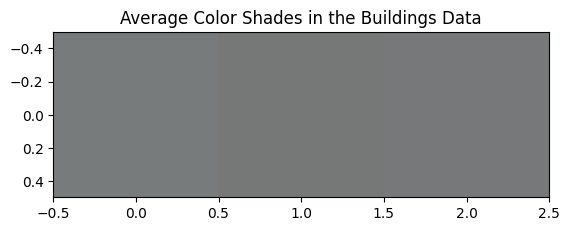

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

building_colors = list()
for image in new_buildings:
    temp_image = image
    
    red = []
    green = []
    blue = []
    for row in temp_image:
        for temp_red, temp_green, temp_blue in row:
            red.append(temp_red)
            green.append(temp_green)
            blue.append(temp_blue)
    
    image_df = pd.DataFrame({'red': red, 'green': green, 'blue': blue})
    
    image_df['norm_red'] = whiten(image_df['red'])
    image_df['norm_green'] = whiten(image_df['green'])
    image_df['norm_blue'] = whiten(image_df['blue'])

    cluster_centers, _ = kmeans(image_df[['norm_red', 'norm_green', 'norm_blue']], 3)    
    dominant_colors = []
    
    red_std, green_std, blue_std = image_df[['red','green', 'blue']].std()

    for cluster_center in cluster_centers:
        red_center, green_center, blue_center = cluster_center
        dominant_colors.append((red_center * red_std / 255, green_center * green_std / 255, blue_center * blue_std / 255))
    building_colors.append(dominant_colors)

average_building_colors = np.array(building_colors).mean(axis=0)
print(average_building_colors)

plt.imshow([average_building_colors])
plt.title('Average Color Shades in the Buildings Data')
plt.show()


### Resizing the Images From RGB to Black and White

- In here we perform dimensional reduction on the images. Going from three channels per images to 1 channel image. That is from color to black and white. This is to allow for faster computations and less memory needed for our models. After reducing the dimension we store the images in an list.

In [ ]:
resized_buildings = new_buildings.copy()
i=0
for image in new_buildings:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)        
    resized_buildings[i] = resized_image
    i += 1    

print('resized_buildings[0].shape: ', resized_buildings[0].shape)
print('new_buildings[0].shape: ', new_buildings[0].shape)

print('resized_buildings.shape: ', resized_buildings.shape)
print('new_buildings.shape: ', new_buildings.shape)

print('type(resized_buildings): ', type(resized_buildings))
print('resized_buildings.shape: ', resized_buildings.shape)

resized_buildings[0].shape:  (150, 150)
new_buildings[0].shape:  (150, 150, 3)
resized_buildings.shape:  (2121,)
new_buildings.shape:  (2121,)
type(resized_buildings):  <class 'numpy.ndarray'>
resized_buildings.shape:  (2121,)


### Comparing the 3 Channel Image vs the 1 Channel Image

- here we show a comparison of an image from the buildings training data. On the left side its the original image with its three channels and in the right side its the same image but with one channel. 

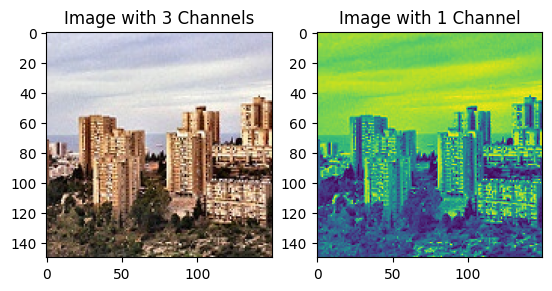

In [ ]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(new_buildings[10])
plt.title("Image with 3 Channels")

plt.subplot(1, 2, 2)
plt.title("Image with 1 Channel")
plt.imshow(resized_buildings[10])

plt.show()

### Saving the 1 Channel Dimension Building Images

- In this step we save the data of the one dimensional channel of the building training images as a numpy array.

In [ ]:
# np.save("resized_buildings.npy", resized_buildings)
print("Data Saved!")
print(list(map(lambda x: x.shape, resized_buildings[:10])))    

Data Saved!
[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


### Same Procedure for Forest Data

- Here we read the images as numpy arrays, we analyze the distribution of dimension and some simple stats and a bar plot

['(150, 150, 3)', '(108, 150, 3)', '(113, 150, 3)', '(136, 150, 3)', '(115, 150, 3)', '(135, 150, 3)', '(133, 150, 3)']
Min: (108, 150, 3)
CumSum:  2271
Min_100:  108


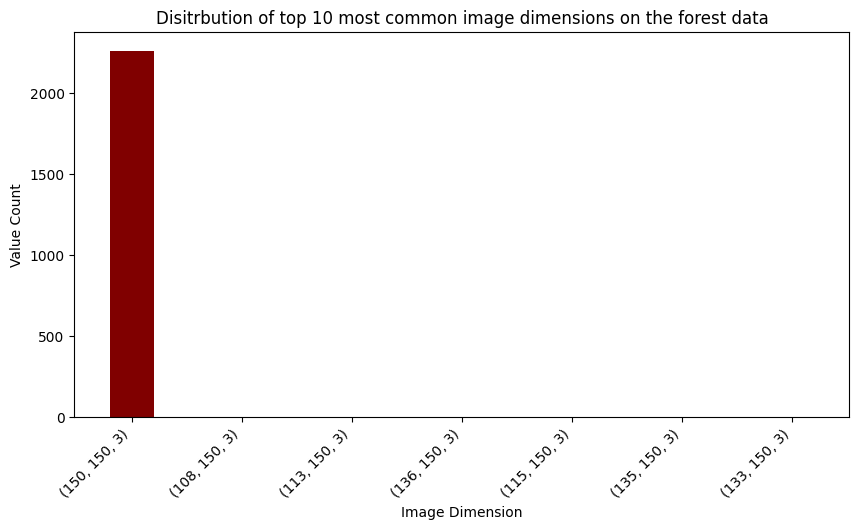

In [ ]:
# FIRST PART
forest_dimensions = list()
forest_images = list()
for i in range(len(forest_path)):
    image = mpimg.imread(forest_path[i])
    dim = np.array(image).shape
    forest_dimensions.append(dim)    
    forest_images.append(np.array(image))
forest_dim_count = pd.DataFrame(pd.value_counts(forest_dimensions), columns=['count'])

forest_dim_x = np.array(forest_dim_count['count'])
forest_dim_labels = list(map(lambda x: str(x), forest_dim_count.index))
print(forest_dim_labels)

print("Min:", min(forest_dimensions))
print("CumSum: ", sum(forest_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], forest_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(forest_dim_labels[:20], forest_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the forest data")
plt.show()

- Here we get the images that have a dimension of 150 by 150 pixels as a form of data normalization and perform dimensional reduction on the images. From 3 channel images to 1 channel images.

In [ ]:
# SECOND PART
forest_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), forest_dimensions))
print("Number of images with a width of 150 pixels or more: ", sum(np.array(forest_dim_) >= 150))  

forest_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), forest_dimensions))
print("Number of images with a length of 150 pixels or more: ", sum(np.array(forest_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_forest = np.array(forest_images)[np.array(forest_dim_) >= 150]
print("new_forest[0].shape: ", new_forest[0].shape)

# THIRD PART
resized_forest = new_forest.copy()
i=0
for image in new_forest:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_forest[i] = resized_image
    i += 1    

print("resized_forest[0].shape:", resized_forest[0].shape)
print("new_forest[0].shape: ", new_forest[0].shape)

print("resized_forest.shape: ", resized_forest.shape)
print("new_forest.shape: ", new_forest.shape)

print("type(resized_forest): ", type(resized_forest))
print("resized_forest.shape: ", resized_forest.shape)

Number of images with a width of 150 pixels or more:  2271
Number of images with a length of 150 pixels or more:  2263
new_forest[0].shape:  (150, 150, 3)
/tmp/ipykernel_40/354228480.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_forest = np.array(forest_images)[np.array(forest_dim_) >= 150]
resized_forest[0].shape: (150, 150)
new_forest[0].shape:  (150, 150, 3)
resized_forest.shape:  (2263,)
new_forest.shape:  (2263,)
type(resized_forest):  <class 'numpy.ndarray'>
resized_forest.shape:  (2263,)


### Correlation Analysis on the Forest Data

- Here we compute multiple statistical calculations on the images to see if there is a correlation between these statistical calculations using a correlation table. All on the images from the forest class of the training data

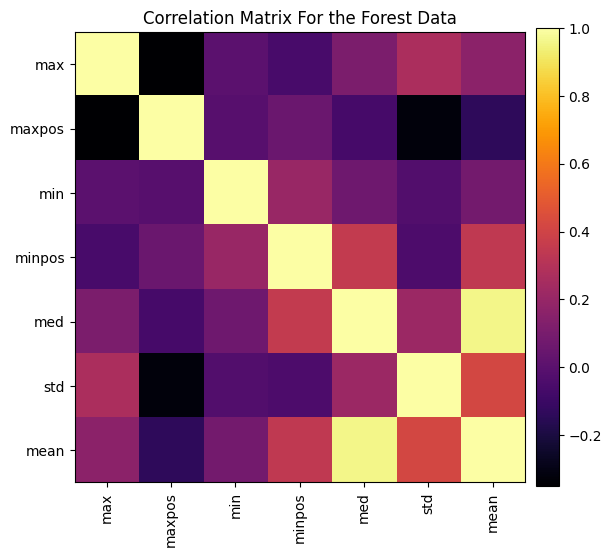

In [ ]:
import pandas as pd
forest_max = [np.max(np.array(x)) for x in new_forest]
forest_maxpos = [np.argmax(np.array(x)) for x in new_forest]
forest_min = [np.min(np.array(x)) for x in new_forest]
forest_minpos = [np.argmin(np.array(x)) for x in new_forest]
forest_med = [np.median(np.array(x)) for x in new_forest]
forest_std = [np.std(np.array(x)) for x in new_forest]
forest_mean = [np.mean(np.array(x)) for x in new_forest]

forest_df = pd.DataFrame({'max': forest_max, 'maxpos': forest_maxpos, 'min': forest_min,
                                'minpos': forest_minpos, 'med': forest_med, 'std': forest_std, 'mean': forest_mean})
corr = forest_df.corr()
fig = plt.figure(1, figsize=(7,7))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(forest_df.columns))
plt.xticks(labels,forest_df.columns,rotation=90)
plt.yticks(labels,forest_df.columns)
plt.title('Correlation Matrix For the Forest Data')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

### Average Color Shade on the Forest Data

- In this step we calculate the average color shade of each channel on the forest training data. By following the same steps as in the building training data images.

[[0.39764467 0.42714898 0.30622669]
 [0.39663733 0.42623366 0.30784397]
 [0.39021936 0.41850179 0.29946185]]


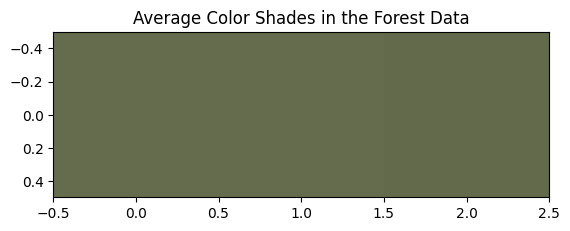

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

forest_colors = list()
for image in new_forest:
    temp_image = image
    
    red = []
    green = []
    blue = []
    for row in temp_image:
        for temp_red, temp_green, temp_blue in row:
            red.append(temp_red)
            green.append(temp_green)
            blue.append(temp_blue)
    
    image_df = pd.DataFrame({'red': red, 'green': green, 'blue': blue})
    
    image_df['norm_red'] = whiten(image_df['red'])
    image_df['norm_green'] = whiten(image_df['green'])
    image_df['norm_blue'] = whiten(image_df['blue'])

    cluster_centers, _ = kmeans(image_df[['norm_red', 'norm_green', 'norm_blue']], 3)    
    dominant_colors = []
    
    red_std, green_std, blue_std = image_df[['red','green', 'blue']].std()

    for cluster_center in cluster_centers:
        red_center, green_center, blue_center = cluster_center
        dominant_colors.append((red_center * red_std / 255, green_center * green_std / 255, blue_center * blue_std / 255))
    forest_colors.append(dominant_colors)
    
average_forest_colors = np.array(forest_colors).mean(axis=0)
print(average_forest_colors)

plt.imshow([average_forest_colors])
plt.title('Average Color Shades in the Forest Data')
plt.show()


- In this step we save the data of the one dimensional channel of the forest training images as a numpy array.

In [ ]:
# np.save("resized_forest.npy", resized_forest)
print("Data Saved!")
print(list(map(lambda x: x.shape, resized_forest[:10])))    

Data Saved!
[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


### Glacier Data

- Here we read the images as numpy arrays, we analyze the distribution of dimension and some simple stats and a bar plot

['(150, 150, 3)', '(111, 150, 3)', '(143, 150, 3)', '(76, 150, 3)', '(149, 150, 3)', '(135, 150, 3)', '(123, 150, 3)', '(146, 150, 3)', '(105, 150, 3)', '(119, 150, 3)', '(142, 150, 3)', '(102, 150, 3)', '(134, 150, 3)', '(110, 150, 3)', '(97, 150, 3)', '(120, 150, 3)']
Min: (76, 150, 3)
CumSum:  2404
Min_100:  102


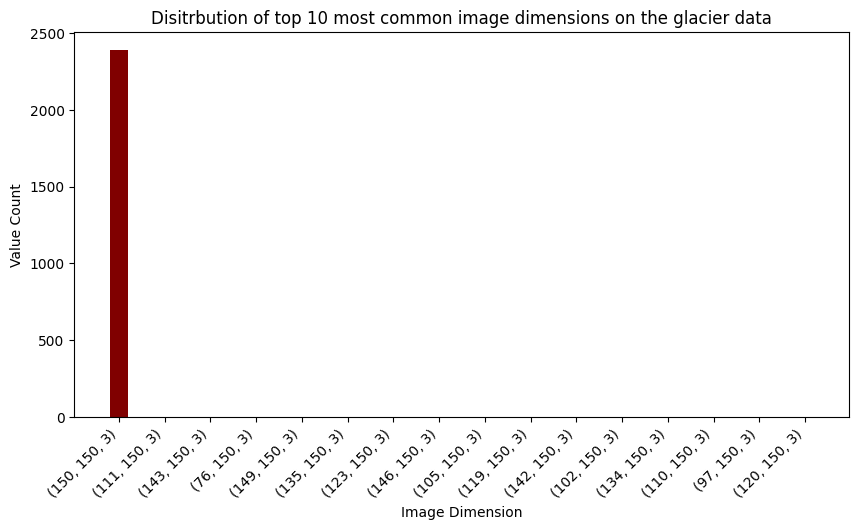

In [ ]:
# FIRST PART
glacier_dimensions = list()
glacier_images = list()
for i in range(len(glacier_path)):
    image = mpimg.imread(glacier_path[i])
    dim = np.array(image).shape
    glacier_dimensions.append(dim)    
    glacier_images.append(np.array(image))
glacier_dim_count = pd.DataFrame(pd.value_counts(glacier_dimensions), columns=['count'])

glacier_dim_x = np.array(glacier_dim_count['count'])
glacier_dim_labels = list(map(lambda x: str(x), glacier_dim_count.index))
print(glacier_dim_labels)

print("Min:", min(glacier_dimensions))
print("CumSum: ", sum(glacier_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], glacier_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(glacier_dim_labels[:20], glacier_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the glacier data")
plt.show()

- Here we get the images that have a dimension of 150 by 150 pixels as a form of data normalization and perform dimensional reduction on the images. From 3 channel images to 1 channel images.

In [ ]:
# SECOND PART
glacier_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), glacier_dimensions))
print("Number of images with a width of 150 pixels or more: ", sum(np.array(glacier_dim_) >= 150))  

glacier_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), glacier_dimensions))
print("Number of images with a length of 150 pixels or more: ", sum(np.array(glacier_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_glacier = np.array(glacier_images)[np.array(glacier_dim_) >= 150]
print("new_glacier[0].shape: ", new_glacier[0].shape)

# THIRD PART
resized_glacier = new_glacier.copy()
i=0
for image in new_glacier:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_glacier[i] = resized_image
    i += 1    

print("resized_glacier[0].shape: ", resized_glacier[0].shape)
print("new_glacier[0].shape: ", new_glacier[0].shape)

print("resized_glacier.shape: ", resized_glacier.shape)
print("new_glacier.shape: ", new_glacier.shape)

print("type(resized_glacier): ", type(resized_glacier))
print("resized_glacier.shape: ", resized_glacier.shape)

Number of images with a width of 150 pixels or more:  2404
Number of images with a length of 150 pixels or more:  2387
new_glacier[0].shape:  (150, 150, 3)
/tmp/ipykernel_40/2387835374.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_glacier = np.array(glacier_images)[np.array(glacier_dim_) >= 150]
resized_glacier[0].shape:  (150, 150)
new_glacier[0].shape:  (150, 150, 3)
resized_glacier.shape:  (2387,)
new_glacier.shape:  (2387,)
type(resized_glacier):  <class 'numpy.ndarray'>
resized_glacier.shape:  (2387,)


### Correlation Analysis on the Glacier Data

- Here we compute multiple statistical calculations on the images to see if there is a correlation between these statistical calculations using a correlation table. All on the images from the glacier class of the training data

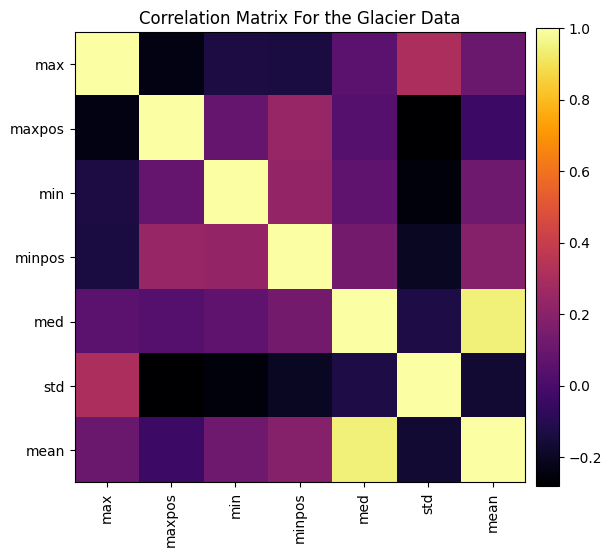

In [ ]:
import pandas as pd
glacier_max = [np.max(np.array(x)) for x in new_glacier]
glacier_maxpos = [np.argmax(np.array(x)) for x in new_glacier]
glacier_min = [np.min(np.array(x)) for x in new_glacier]
glacier_minpos = [np.argmin(np.array(x)) for x in new_glacier]
glacier_med = [np.median(np.array(x)) for x in new_glacier]
glacier_std = [np.std(np.array(x)) for x in new_glacier]
glacier_mean = [np.mean(np.array(x)) for x in new_glacier]

glacier_df = pd.DataFrame({'max': glacier_max, 'maxpos': glacier_maxpos, 'min': glacier_min,
                                'minpos': glacier_minpos, 'med': glacier_med, 'std': glacier_std, 'mean': glacier_mean})
corr = glacier_df.corr()
fig = plt.figure(1, figsize=(7,7))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(glacier_df.columns))
plt.xticks(labels,glacier_df.columns,rotation=90)
plt.yticks(labels,glacier_df.columns)
plt.title('Correlation Matrix For the Glacier Data')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

### Average Color Shade on the Glacier Data

- In this step we calculate the average color shade of each channel on the glacier training data. By following the same steps as in the building training data images.

[[0.47154745 0.52803798 0.57470364]
 [0.44803088 0.50536833 0.55512858]
 [0.47691718 0.53473016 0.58490958]]


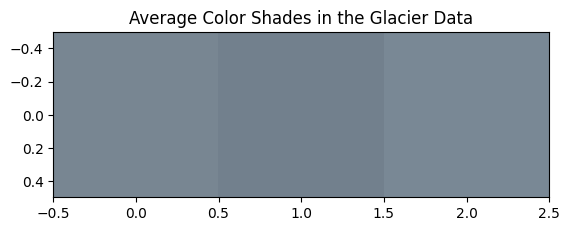

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

glacier_colors = list()
for image in new_glacier:
    temp_image = image
    
    red = []
    green = []
    blue = []
    for row in temp_image:
        for temp_red, temp_green, temp_blue in row:
            red.append(temp_red)
            green.append(temp_green)
            blue.append(temp_blue)
    
    image_df = pd.DataFrame({'red': red, 'green': green, 'blue': blue})
    
    image_df['norm_red'] = whiten(image_df['red'])
    image_df['norm_green'] = whiten(image_df['green'])
    image_df['norm_blue'] = whiten(image_df['blue'])

    cluster_centers, _ = kmeans(image_df[['norm_red', 'norm_green', 'norm_blue']], 3)    
    dominant_colors = []
    
    red_std, green_std, blue_std = image_df[['red','green', 'blue']].std()

    for cluster_center in cluster_centers:
        red_center, green_center, blue_center = cluster_center
        dominant_colors.append((red_center * red_std / 255, green_center * green_std / 255, blue_center * blue_std / 255))
    glacier_colors.append(dominant_colors)
    
average_glacier_colors = np.array(glacier_colors).mean(axis=0)
print(average_glacier_colors)

plt.imshow([average_glacier_colors])
plt.title('Average Color Shades in the Glacier Data')
plt.show()


- In this step we save the data of the one dimensional channel of the glacier training images as a numpy array.

In [ ]:
# np.save("resized_glacier.npy", resized_glacier)
print("Saved Data!")
print(list(map(lambda x: x.shape, resized_glacier[:10])))    

Saved Data!
[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


### Mountain Data

- Here we read the images as numpy arrays, we analyze the distribution of dimension and some simple stats and a bar plot

['(150, 150, 3)', '(144, 150, 3)', '(143, 150, 3)', '(145, 150, 3)', '(134, 150, 3)', '(100, 150, 3)', '(113, 150, 3)', '(103, 150, 3)', '(131, 150, 3)', '(81, 150, 3)', '(142, 150, 3)', '(147, 150, 3)', '(146, 150, 3)', '(123, 150, 3)', '(135, 150, 3)', '(136, 150, 3)', '(141, 150, 3)']
Min: (81, 150, 3)
CumSum:  2512
Min_100:  100


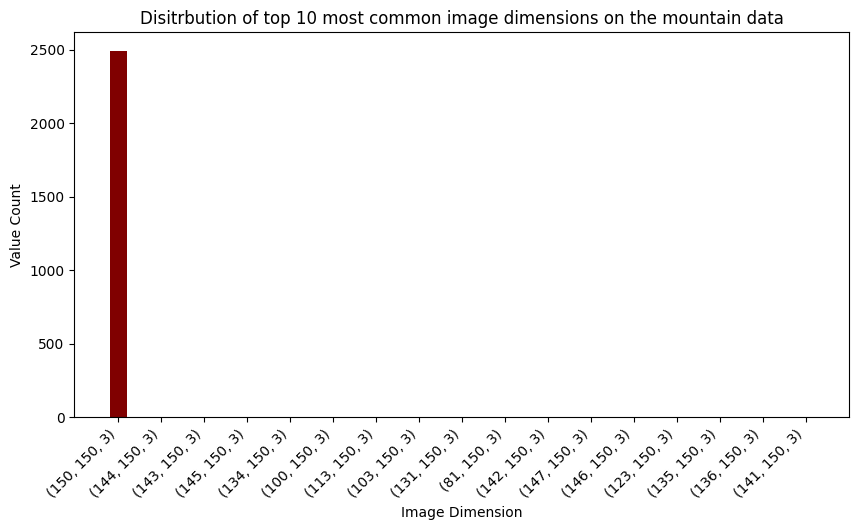

In [ ]:
# FIRST PART
mountain_dimensions = list()
mountain_images = list()
for i in range(len(mountain_path)):
    image = mpimg.imread(mountain_path[i])
    dim = np.array(image).shape
    mountain_dimensions.append(dim)    
    mountain_images.append(np.array(image))
mountain_dim_count = pd.DataFrame(pd.value_counts(mountain_dimensions), columns=['count'])

mountain_dim_x = np.array(mountain_dim_count['count'])
mountain_dim_labels = list(map(lambda x: str(x), mountain_dim_count.index))
print(mountain_dim_labels)

print("Min:", min(mountain_dimensions))
print("CumSum: ", sum(mountain_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], mountain_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(mountain_dim_labels[:20], mountain_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the mountain data")
plt.show()

- Here we get the images that have a dimension of 150 by 150 pixels as a form of data normalization and perform dimensional reduction on the images. From 3 channel images to 1 channel images.

In [ ]:
# SECOND PART
mountain_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), mountain_dimensions))
print("Number of images with a width of 150 pixels or more: ", sum(np.array(mountain_dim_) >= 150))  

mountain_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), mountain_dimensions))
print("Number of images with a length of 150 pixels or more: ", sum(np.array(mountain_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_mountain = np.array(mountain_images)[np.array(mountain_dim_) >= 150]
print("new_mountain[0].shape: ", new_mountain[0].shape)

# THIRD PART
resized_mountain = new_mountain.copy()
i=0
for image in new_mountain:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_mountain[i] = resized_image
    i += 1    

print("resized_mountain[0].shape: ", resized_mountain[0].shape)
print("new_mountain[0].shape: ", new_mountain[0].shape)

print("resized_mountain.shape: ", resized_mountain.shape)
print("new_mountain.shape: ", new_mountain.shape)

print("type(resized_mountain): ", type(resized_mountain))
print("resized_mountain.shape: ", resized_mountain.shape)

Number of images with a width of 150 pixels or more:  2512
Number of images with a length of 150 pixels or more:  2495
new_mountain[0].shape:  (150, 150, 3)
/tmp/ipykernel_40/2435459687.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_mountain = np.array(mountain_images)[np.array(mountain_dim_) >= 150]
resized_mountain[0].shape:  (150, 150)
new_mountain[0].shape:  (150, 150, 3)
resized_mountain.shape:  (2495,)
new_mountain.shape:  (2495,)
type(resized_mountain):  <class 'numpy.ndarray'>
resized_mountain.shape:  (2495,)


### Correlation Analysis on Mountain Data

- Here we compute multiple statistical calculations on the images to see if there is a correlation between these statistical calculations using a correlation table. All on the images from the mountain class of the training data

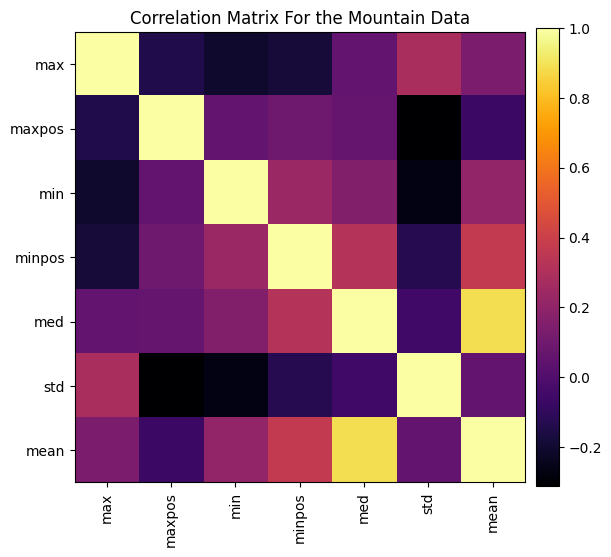

In [ ]:
import pandas as pd
mountain_max = [np.max(np.array(x)) for x in new_mountain]
mountain_maxpos = [np.argmax(np.array(x)) for x in new_mountain]
mountain_min = [np.min(np.array(x)) for x in new_mountain]
mountain_minpos = [np.argmin(np.array(x)) for x in new_mountain]
mountain_med = [np.median(np.array(x)) for x in new_mountain]
mountain_std = [np.std(np.array(x)) for x in new_mountain]
mountain_mean = [np.mean(np.array(x)) for x in new_mountain]

mountain_df = pd.DataFrame({'max': mountain_max, 'maxpos': mountain_maxpos, 'min': mountain_min,
                                'minpos': mountain_minpos, 'med': mountain_med, 'std': mountain_std, 'mean': mountain_mean})
corr = mountain_df.corr()
fig = plt.figure(1, figsize=(7,7))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(mountain_df.columns))
plt.xticks(labels,mountain_df.columns,rotation=90)
plt.yticks(labels,mountain_df.columns)
plt.title('Correlation Matrix For the Mountain Data')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

### Average Color Shade on the Mountain Data

- In this step we calculate the average color shade of each channel on the mountain training data. By following the same steps as in the building training data images.

[[0.45697291 0.49841334 0.52384448]
 [0.44704765 0.49015615 0.51655755]
 [0.44260498 0.48425597 0.51207236]]


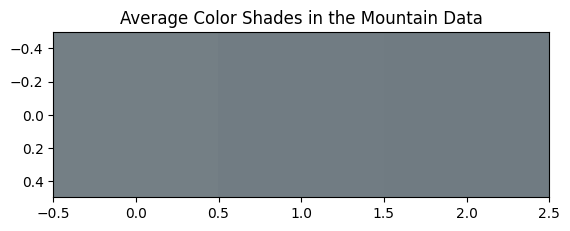

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

mountain_colors = list()
for image in new_mountain:
    temp_image = image
    
    red = []
    green = []
    blue = []
    for row in temp_image:
        for temp_red, temp_green, temp_blue in row:
            red.append(temp_red)
            green.append(temp_green)
            blue.append(temp_blue)
    
    image_df = pd.DataFrame({'red': red, 'green': green, 'blue': blue})
    
    image_df['norm_red'] = whiten(image_df['red'])
    image_df['norm_green'] = whiten(image_df['green'])
    image_df['norm_blue'] = whiten(image_df['blue'])

    cluster_centers, _ = kmeans(image_df[['norm_red', 'norm_green', 'norm_blue']], 3)    
    dominant_colors = []
    
    red_std, green_std, blue_std = image_df[['red','green', 'blue']].std()

    for cluster_center in cluster_centers:
        red_center, green_center, blue_center = cluster_center
        dominant_colors.append((red_center * red_std / 255, green_center * green_std / 255, blue_center * blue_std / 255))
    mountain_colors.append(dominant_colors)
    
average_mountain_colors = np.array(mountain_colors).mean(axis=0)
print(average_mountain_colors)

plt.imshow([average_mountain_colors])
plt.title('Average Color Shades in the Mountain Data')
plt.show()


- In this step we save the data of the one dimensional channel of the mountain training images as a numpy array.

In [ ]:
#np.save("resized_mountain.npy", resized_mountain)
print("Saved Data!")
print(list(map(lambda x: x.shape, resized_mountain[:10])))    

Saved Data!
[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


### Sea Data

- Here we read the images as numpy arrays, we analyze the distribution of dimension and some simple stats and a bar plot

['(150, 150, 3)', '(113, 150, 3)', '(140, 150, 3)']
Min: (113, 150, 3)
CumSum:  2274
Min_100:  113


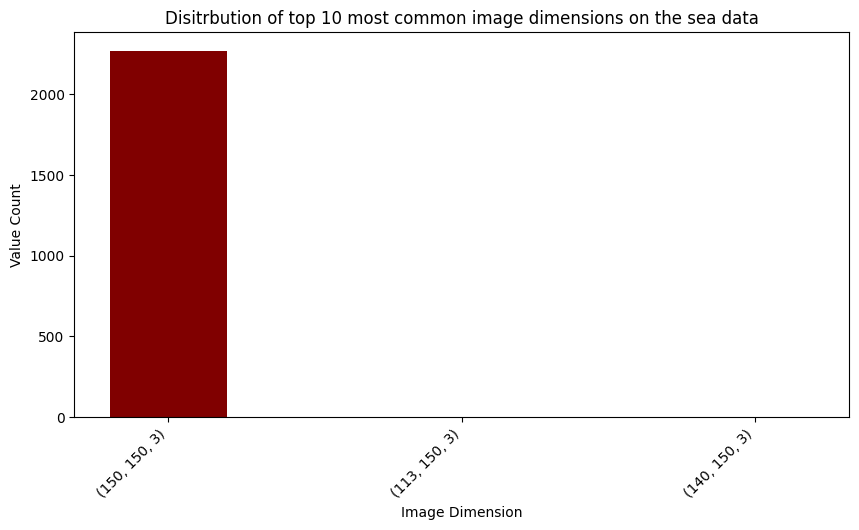

In [ ]:
# FIRST PART
sea_dimensions = list()
sea_images = list()
for i in range(len(sea_path)):
    image = mpimg.imread(sea_path[i])
    dim = np.array(image).shape
    sea_dimensions.append(dim)    
    sea_images.append(np.array(image))
sea_dim_count = pd.DataFrame(pd.value_counts(sea_dimensions), columns=['count'])

sea_dim_x = np.array(sea_dim_count['count'])
sea_dim_labels = list(map(lambda x: str(x), sea_dim_count.index))
print(sea_dim_labels)

print("Min:", min(sea_dimensions))
print("CumSum: ", sum(sea_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], sea_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(sea_dim_labels[:20], sea_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the sea data")
plt.show()

- Here we get the images that have a dimension of 150 by 150 pixels as a form of data normalization and perform dimensional reduction on the images. From 3 channel images to 1 channel images.

In [ ]:
# SECOND PART
sea_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), sea_dimensions))
print("Number of images with a width of 150 pixels or more: ", sum(np.array(sea_dim_) >= 150))  

sea_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), sea_dimensions))
print("Number of images with a length of 150 pixels or more: ", sum(np.array(sea_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_sea = np.array(sea_images)[np.array(sea_dim_) >= 150]
print("new_sea[0].shape: ", new_sea[0].shape)

# THIRD PART
resized_sea = new_sea.copy()
i=0
for image in new_sea:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_sea[i] = resized_image
    i += 1    

print("resized_sea[0].shape: ", resized_sea[0].shape)
print("new_sea[0].shape: ", new_sea[0].shape)

print("resized_sea.shape: ", resized_sea.shape)
print("new_sea.shape: ", new_sea.shape)

print("type(resized_sea): ", type(resized_sea))
print("resized_sea.shape: ", resized_sea.shape)

Number of images with a width of 150 pixels or more:  2274
Number of images with a length of 150 pixels or more:  2270
new_sea[0].shape:  (150, 150, 3)
/tmp/ipykernel_40/3508292174.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_sea = np.array(sea_images)[np.array(sea_dim_) >= 150]
resized_sea[0].shape:  (150, 150)
new_sea[0].shape:  (150, 150, 3)
resized_sea.shape:  (2270,)
new_sea.shape:  (2270,)
type(resized_sea):  <class 'numpy.ndarray'>
resized_sea.shape:  (2270,)


### Correlation Analysis on the Sea Data

- Here we compute multiple statistical calculations on the images to see if there is a correlation between these statistical calculations using a correlation table. All on the images from the sea class of the training data

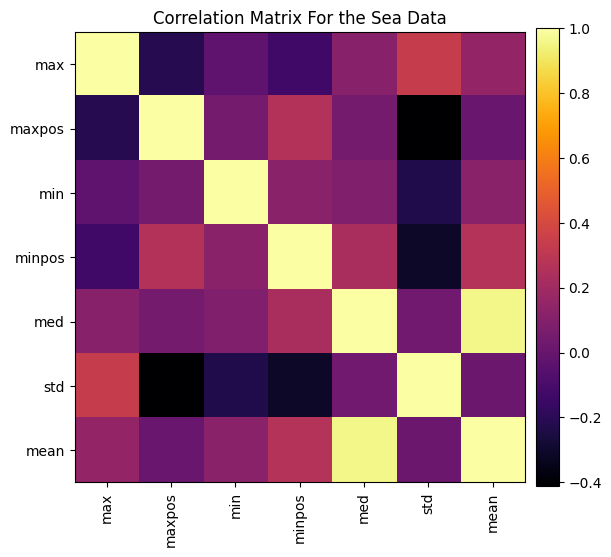

In [ ]:
import pandas as pd
sea_max = [np.max(np.array(x)) for x in new_sea]
sea_maxpos = [np.argmax(np.array(x)) for x in new_sea]
sea_min = [np.min(np.array(x)) for x in new_sea]
sea_minpos = [np.argmin(np.array(x)) for x in new_sea]
sea_med = [np.median(np.array(x)) for x in new_sea]
sea_std = [np.std(np.array(x)) for x in new_sea]
sea_mean = [np.mean(np.array(x)) for x in new_sea]

sea_df = pd.DataFrame({'max': sea_max, 'maxpos': sea_maxpos, 'min': sea_min,
                                'minpos': sea_minpos, 'med': sea_med, 'std': sea_std, 'mean': sea_mean})
corr = sea_df.corr()
fig = plt.figure(1, figsize=(7,7))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(sea_df.columns))
plt.xticks(labels,sea_df.columns,rotation=90)
plt.yticks(labels,sea_df.columns)
plt.title('Correlation Matrix For the Sea Data')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

### Average Color Shade on the Sea Data

- In this step we calculate the average color shade of each channel on the sea training data. By following the same steps as in the building training data images.

[[0.45305045 0.48653659 0.50034435]
 [0.45247488 0.48192905 0.49251568]
 [0.44940719 0.48360289 0.49865631]]


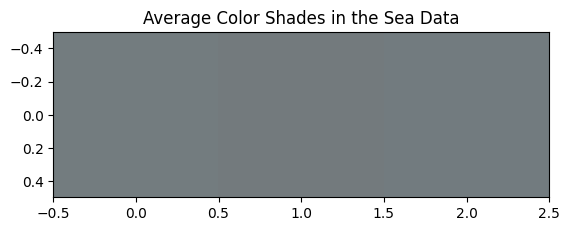

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

sea_colors = list()
for image in new_sea:
    temp_image = image
    
    red = []
    green = []
    blue = []
    for row in temp_image:
        for temp_red, temp_green, temp_blue in row:
            red.append(temp_red)
            green.append(temp_green)
            blue.append(temp_blue)
    
    image_df = pd.DataFrame({'red': red, 'green': green, 'blue': blue})
    
    image_df['norm_red'] = whiten(image_df['red'])
    image_df['norm_green'] = whiten(image_df['green'])
    image_df['norm_blue'] = whiten(image_df['blue'])

    cluster_centers, _ = kmeans(image_df[['norm_red', 'norm_green', 'norm_blue']], 3)    
    dominant_colors = []
    
    red_std, green_std, blue_std = image_df[['red','green', 'blue']].std()

    for cluster_center in cluster_centers:
        red_center, green_center, blue_center = cluster_center
        dominant_colors.append((red_center * red_std / 255, green_center * green_std / 255, blue_center * blue_std / 255))
    sea_colors.append(dominant_colors)
    
average_sea_colors = np.array(sea_colors).mean(axis=0)
print(average_sea_colors)

plt.imshow([average_sea_colors])
plt.title('Average Color Shades in the Sea Data')
plt.show()


- In this step we save the data of the one dimensional channel of the sea training images as a numpy array.

In [ ]:
#np.save("resized_sea.npy", resized_sea)
print("Saved Data!")
print(list(map(lambda x: x.shape, resized_sea[:10])))    

Saved Data!
[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


### Street Data

- Here we read the images as numpy arrays, we analyze the distribution of dimension and some simple stats and a bar plot

['(150, 150, 3)', '(113, 150, 3)']
Min: (113, 150, 3)
CumSum:  2382
Min_100:  113


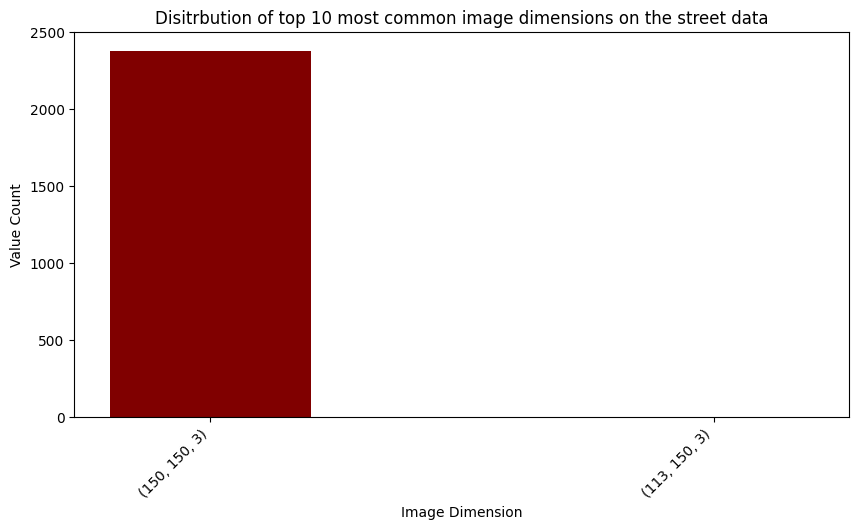

In [ ]:
# FIRST PART
street_dimensions = list()
street_images = list()
for i in range(len(street_path)):
    image = mpimg.imread(street_path[i])
    dim = np.array(image).shape
    street_dimensions.append(dim)    
    street_images.append(np.array(image))
street_dim_count = pd.DataFrame(pd.value_counts(street_dimensions), columns=['count'])

street_dim_x = np.array(street_dim_count['count'])
street_dim_labels = list(map(lambda x: str(x), street_dim_count.index))
print(street_dim_labels)

print("Min:", min(street_dimensions))
print("CumSum: ", sum(street_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], street_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(street_dim_labels[:20], street_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the street data")
plt.show()

- Here we get the images that have a dimension of 150 by 150 pixels as a form of data normalization and perform dimensional reduction on the images. From 3 channel images to 1 channel images.

In [ ]:
# SECOND PART
street_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), street_dimensions))
print("Number of images with a width of 150 pixels or more: ", sum(np.array(street_dim_) >= 150))  

street_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), street_dimensions))
print("Number of images with a length of 150 pixels or more: ", sum(np.array(street_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_street = np.array(street_images)[np.array(street_dim_) >= 150]
print("new_street[0].shape: ", new_street[0].shape)

# THIRD PART
resized_street = new_street.copy()
i=0
for image in new_street:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_street[i] = resized_image
    i += 1    

print("resized_street[0].shape: ", resized_street[0].shape)
print("new_street[0].shape: ", new_street[0].shape)

print("resized_street.shape: ", resized_street.shape)
print("new_street.shape: ", new_street.shape)

print("type(resized_street): ", type(resized_street))
print("resized_street.shape: ", resized_street.shape)

Number of images with a width of 150 pixels or more:  2382
Number of images with a length of 150 pixels or more:  2381
new_street[0].shape:  (150, 150, 3)
/tmp/ipykernel_40/3032715630.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_street = np.array(street_images)[np.array(street_dim_) >= 150]
resized_street[0].shape:  (150, 150)
new_street[0].shape:  (150, 150, 3)
resized_street.shape:  (2381,)
new_street.shape:  (2381,)
type(resized_street):  <class 'numpy.ndarray'>
resized_street.shape:  (2381,)


### Correlation Analysis on the Street Data

- Here we compute multiple statistical calculations on the images to see if there is a correlation between these statistical calculations using a correlation table. All on the images from the street class of the training data

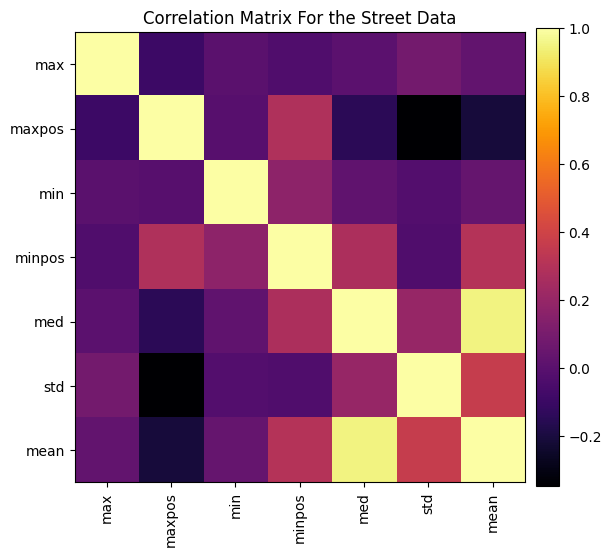

In [ ]:
import pandas as pd
street_max = [np.max(np.array(x)) for x in new_street]
street_maxpos = [np.argmax(np.array(x)) for x in new_street]
street_min = [np.min(np.array(x)) for x in new_street]
street_minpos = [np.argmin(np.array(x)) for x in new_street]
street_med = [np.median(np.array(x)) for x in new_street]
street_std = [np.std(np.array(x)) for x in new_street]
street_mean = [np.mean(np.array(x)) for x in new_street]

street_df = pd.DataFrame({'max': street_max, 'maxpos': street_maxpos, 'min': street_min,
                                'minpos': street_minpos, 'med': street_med, 'std': street_std, 'mean': street_mean})
corr = street_df.corr()
fig = plt.figure(1, figsize=(7,7))
plt.imshow(corr,cmap='inferno')
labels = np.arange(len(street_df.columns))
plt.xticks(labels,street_df.columns,rotation=90)
plt.yticks(labels,street_df.columns)
plt.title('Correlation Matrix For the Street Data')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

### Average Color Shade on the Street Data

- In this step we calculate the average color shade of each channel on the street training data. By following the same steps as in the building training data images.

[[0.47524583 0.46158812 0.44583894]
 [0.47676373 0.46592792 0.45280486]
 [0.46173408 0.44921542 0.43529772]]


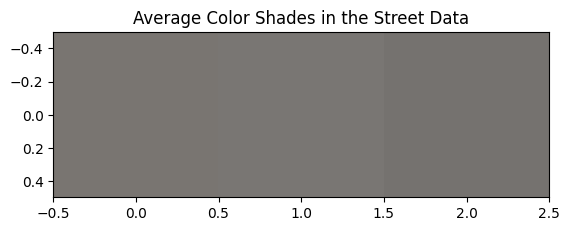

In [ ]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
import pandas as pd

street_colors = list()
for image in new_street:
    temp_image = image
    
    red = []
    green = []
    blue = []
    for row in temp_image:
        for temp_red, temp_green, temp_blue in row:
            red.append(temp_red)
            green.append(temp_green)
            blue.append(temp_blue)
    
    image_df = pd.DataFrame({'red': red, 'green': green, 'blue': blue})
    
    image_df['norm_red'] = whiten(image_df['red'])
    image_df['norm_green'] = whiten(image_df['green'])
    image_df['norm_blue'] = whiten(image_df['blue'])

    cluster_centers, _ = kmeans(image_df[['norm_red', 'norm_green', 'norm_blue']], 3)    
    dominant_colors = []
    
    red_std, green_std, blue_std = image_df[['red','green', 'blue']].std()

    for cluster_center in cluster_centers:
        red_center, green_center, blue_center = cluster_center
        dominant_colors.append((red_center * red_std / 255, green_center * green_std / 255, blue_center * blue_std / 255))
    street_colors.append(dominant_colors)
    
average_street_colors = np.array(street_colors).mean(axis=0)
print(average_street_colors)

plt.imshow([average_street_colors])
plt.title('Average Color Shades in the Street Data')
plt.show()


- In this step we save the data of the one dimensional channel of the street training images as a numpy array.

In [ ]:
#np.save("resized_street.npy", resized_street)
print("Saved Data!")
print(list(map(lambda x: x.shape, resized_street[:10])))    

Saved Data!
[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


### Frequency Distribution of Images per Class

- In this step we calculate the class frequency distribution of the images to see if there is unbalance in the data.

Text(0.5, 1.0, 'Distribution of Classes in the Training Data')

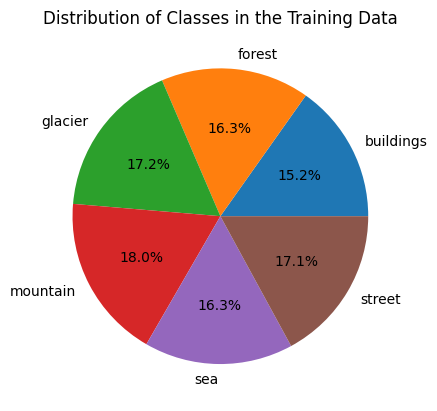

In [ ]:
import matplotlib.pyplot as plt 

class_frequency = [2122, 2271, 2404, 2512, 2274, 2382]
labels = 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'

fig, ax = plt.subplots()
ax.pie(class_frequency, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Classes in the Training Data')


### Restarting Notebook and Getting our Resized Images and Selecting 1500 per class

- We only selected 1500 images per class to be used on our models since DeepNote only has 5GB of RAM. Here we load all the previous saved data after restarting the notebook

In [ ]:
import pandas as pd
import numpy as np

resized_buildings = np.load("resized_buildings.npy", allow_pickle=True)
resized_forest = np.load("resized_forest.npy", allow_pickle=True)
resized_glacier = np.load("resized_glacier.npy", allow_pickle=True)
resized_mountain = np.load("resized_mountain.npy", allow_pickle=True)
resized_sea = np.load("resized_sea.npy", allow_pickle=True)
resized_street = np.load("resized_street.npy", allow_pickle=True)


### Selecting 1500 Images Per Class. So to Accomodate for RAM Usage and to Have an Equal Data Distribution From all Classes

- Here we save the first 1,500 images per class.

In [ ]:
#np.save("min_resized_buildings.npy", resized_buildings[:1500])
#np.save("min_resized_forest.npy", resized_forest[:1500])
#np.save("min_resized_glacier.npy", resized_glacier[:1500])
#np.save("min_resized_mountain.npy", resized_mountain[:1500])

#np.save("min_resized_sea.npy", resized_sea[:1500])
#np.save("min_resized_street.npy", resized_street[:1500])


### Here We Would Restart the Server to Free RAM and Load the 1500 Images Per Class

- Here we restardt the notbook and load the 1,500 images per class to work with.

In [ ]:
# GETTING MIN SAMPLE SIZE
import pandas as pd
import numpy as np

resized_buildings = np.load("min_resized_buildings.npy", allow_pickle=True)
resized_forest = np.load("min_resized_forest.npy", allow_pickle=True)
resized_glacier = np.load("min_resized_glacier.npy", allow_pickle=True)
resized_mountain = np.load("min_resized_mountain.npy", allow_pickle=True)
resized_sea = np.load("min_resized_sea.npy", allow_pickle=True)
resized_street = np.load("min_resized_street.npy", allow_pickle=True)


In [ ]:
print(len(resized_buildings))
print(len(resized_forest))
print(len(resized_glacier))
print(len(resized_mountain))
print(len(resized_sea))
print(len(resized_street))

1500
1500
1500
1500
1500
1500


### Resizing Data Start (For all classes)

- In this step we resize the images so it becomes a 3D array instead of a list with 2D arrays. 

In [ ]:
new_street_data = []
for i in range(len(resized_street)):   
    new_street_data.append(resized_street[i])
new_street_data = np.array(new_street_data)    
print(new_street_data.shape)


(1500, 150, 150)


- In this step we save the resized data of the 1,500 images per class that we indexed from.

In [ ]:
np.save("new_street_data.npy", new_street_data)

### Stacking the Data Into a Single Array

- In this step we stack all the numpy array of the classes into a single numpy array that would be used as the training X_data on our model.

In [ ]:
# GETTING MIN SAMPLE SIZE
import pandas as pd
import numpy as np

new_buildings_data = np.load("new_buildings_data.npy", allow_pickle=True)
new_forest_data = np.load("new_forest_data.npy", allow_pickle=True)
new_glacier_data = np.load("new_glacier_data.npy", allow_pickle=True)
new_mountain_data = np.load("new_mountain_data.npy", allow_pickle=True)
new_sea_data = np.load("new_sea_data.npy", allow_pickle=True)
new_street_data = np.load("new_street_data.npy", allow_pickle=True)

In [ ]:
data = np.vstack((new_buildings_data, new_forest_data, new_glacier_data, new_mountain_data, new_sea_data, new_street_data))

In [ ]:
np.save("data.npy", data)

### Creating the Array for the Labels for the Classes

- In this step we create numpy numpy arrays with a categorical value that would represent each class. That is 0 for buildings, 1 for forests, 2, for glaciers, 3 for mountains, 4 for seas, and 5 for streets

In [ ]:
import numpy as np
buildings_label = np.zeros(1500)
forest_label = np.ones(1500)
glacier_label = np.empty(1500)
mountain_label = np.empty(1500)
sea_label = np.empty(1500)
street_label = np.empty(1500)

glacier_label.fill(2)
mountain_label.fill(3)
sea_label.fill(4)
street_label.fill(5)

labels = np.concatenate((buildings_label, forest_label, glacier_label, mountain_label, sea_label, street_label))
print(buildings_label.shape)
print(forest_label.shape)
print(glacier_label.shape)
print(mountain_label.shape)
print(sea_label.shape)
print(street_label.shape)

print(labels.shape)



(1500,)
(1500,)
(1500,)
(1500,)
(1500,)
(1500,)
(9000,)


- Save the labels associated with the classes of the images

In [ ]:
np.save("labels.npy", labels)

### Getting Finished Data and Labels

- We load the data and the labels of the training data we are going to work with

In [ ]:
import numpy as np
import pandas as pd

data = np.load("data.npy", allow_pickle=True)
labels = np.load("labels.npy", allow_pickle=True)

### Restarting Notebook and Loading Images to Be Splited into Train and Test Data

- We call the train_test_split function from sklearn to shuffle and get our data ready.

In [ ]:
from sklearn.model_selection import train_test_split

# 0.1 best model
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42, shuffle=True)

print(X_train[0].shape)
print(X_train.shape)


(150, 150)
(8100, 150, 150)


- We save the training and test data from that, so we can have enough RAM for the server to perform the deep learning compuations on the data.

In [ ]:
np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy",  y_test)

### Getting Training Data 

- Loading the X_train and y_train data. With the X_train being reshaped once more so it can be accepted into our first convolutional layer in our model.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

X_train = np.load("X_train.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)

print(type(X_train))
print(type(y_train))
print(X_train[0].shape)

X_train = X_train.reshape(X_train.shape[0],150,150,1)

print(X_train.shape)


2023-12-03 23:33:40.220058: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 23:33:40.404830: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-03 23:33:40.404863: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-03 23:33:40.456497: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 23:33:41.810535: W tensorflow/stream_executor/pla

### Data Augmentation

- In this step we call a two image augmentation function from Keras into a Sequential model. We do a random flip from horizontal and vertical axis . And we also have a random rotation function that rotates in any direction with a 20% rotation. We then stack the augmented data to the X_train data and we add additional labeling ot the y_train data. 

In [ ]:
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal_and_vertical'), 
                                        tf.keras.layers.RandomRotation(0.2)])
randomIndex = np.random.randint(0, len(X_train), 330)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
for index in randomIndex:
    image = tf.cast(tf.expand_dims(X_train[index], 0), tf.float32)
    label = y_train[index]
    tempList = []
    for _ in range(4):
        temp = data_augmentation(image)
        tempList.append(temp)
    x = np.array(tempList[0])
    for i in range(1, len(tempList)):
        y = np.array(tempList[i])
        x = np.vstack([x, y])
    X_train = np.vstack([X_train, x])   
    y_train = np.hstack([y_train, np.repeat([label], 4)])
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
    

X_train.shape:  (8070, 150, 150, 1)
y_train.shape:  (8070,)


- Here we print some examples of the augmented data we created.

X_train.shape:  (8070, 150, 150, 1)
y_train.shape:  (8070,)


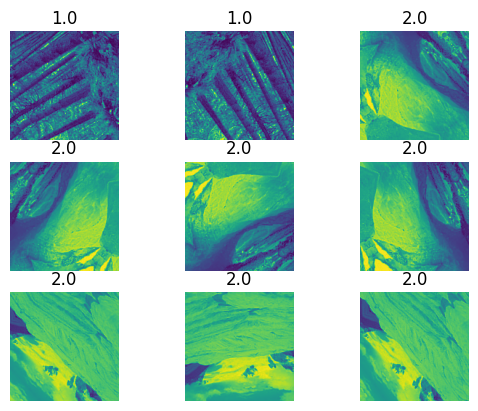

In [ ]:
from matplotlib import pyplot as plt
j = 0
for i in range(7492, 7501):
    ax = plt.subplot(3,3, j+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')
    j += 1

print("X_train.shape: ", X_train.shape)    
print("y_train.shape: ", y_train.shape)

- Here we save the data as X_train_augmented and y_train_augmented. This so we can know which data we are working when we create the models

In [ ]:
np.save("X_train_augmented.npy", X_train)
np.save("y_train_augmented.npy", y_train)

### Getting the Data (Augmented Version)

- In here we can call the augmented data. 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

X_train = np.load("X_train_augmented.npy", allow_pickle=True)
y_train = np.load("y_train_augmented.npy", allow_pickle=True)

print(X_train.shape)
print(y_train.shape)


2023-12-04 00:13:49.616009: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 00:13:49.769902: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-04 00:13:49.769952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-04 00:13:49.810665: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-04 00:13:51.962374: W tensorflow/stream_executor/platform/de

### Methodology

1. Methodology: The main methodology used in this image multi-class classificatino problem was the use of Convolutional Neural Networks. We make use of images that had been read as with 3-channels and then transformed to have 1 channel. The convolutional neural network makes use convolutional layers that work by identifying key edges, corners, colors, and other features using kernel filters. We also make use MaxPooling layers that get the maximum value between neghboring pixels to reduce the image pixel size. We also make use of dropout layers that work by adding regularization to our model. Finally we also make use of dense layers to narrow down the six possible category labels of the images. Each layer also has the ability to use activation layers, such as relu which introduces non-linearity to the model, alowing the model to solve the problem. Additionally we add softmax activation functions that helps us in creating a multinomial probability distribution. Finally we also make use of an dynamic optimizer like RMSProp that adjusts the weights during training. Also we make use of the sparse categorical crossentropy which is a popular loss function when dealing with categorical problems.

2. Introduce the Deep Neural Networks you udes in your project.

    * Model 1: model_2conv_48_2Max_100Dense_1Dropout_4epoch_weights.h5
        * Description: One of the first models we created. This model had 2 convolutional layers with kernel filters of 48, and then 2 max pooling layers that had a size of (2,2) filter. Then we followed it with a 100 neuron size dense layer and then a 6 neuron dense layer. The model was run with 4 epochs and used non-augmented data. The test score of this model was of 70%

    * Model 2: model_2conv64_2conv64_2conv64_3Max_1Dense125_1Dense64_1Dropout_7epoch_weights.h5
        * Description: This other model had 2 convolutional layer with kernel size of 64 followed by a max pooling layer with size of (2,2). And we had three of those blocks. Followed by a Dense layer of 125 neurons, another of 64 neurons and another of 6 neurons and this time we had a dropout layer. We ran the model for 7 epochs this time and used non-augmented data. The test score accuracy score of this model as of 74%. 

    * Model 3: model8_1conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_10epoch_weights
        * Description: This model was our best model using simple vanilla convolutional neural network. This one had 1 convolutional layer with a kernel size of 48 followed by a max pooling layer of size (2,2). Then another convolutional layer of size 48 and another max pooling layer, then a convolutional layer of size 64 a max pooling and then a nother convolutional layer of size 48 and a max pooling layer. Followed by a dropout layer and a 125 size dense layer, a 64 dense layer and a 6 size dense layer. This model was run for 10 epochs and used non-augmented data. The test score of this model was as of 78.44%.

    * Model 4: model_augmented1_2conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_6epoch_weights
        * Description: This model was based on our best model (model 3), but made use of augmented data. However the test accuracy score was that of 65%.


3. Add Keywords.
**Keywords** CNN, convolutional layers, max pooling layers, dense layers, dropout layers, image multi-class classfication, augmented data.

**Example**
* Vanilla CNN
    * A vanilla convolutional neural network is a class of deep neural network, that is popular for image reconition. This type of model makes use of filters to identify key features of an image by calculating the matrix multiplication across the image using the filter. With the help of pooling layers we can reduce the size of the image so it can be better computed such as max pooling which get the highest pixel value in a block of neighboring pixels. Finally a dense layer is placed at the end of the network to generate a probability vector for each possible category.

**Keywords:** Supervised learning, clasification, regularization, filters, matrix multiplication.



### Building Convolutional Neural Networks

In [ ]:
#data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal_and_vertical'), tf.keras.layers.RandomRotation(0.2),])

model = tf.keras.models.Sequential()
#model.add(data_augmentation)
model.add(tf.keras.layers.Conv2D(48, 3, activation=tf.nn.relu, input_shape=(150, 150,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(48, 3, activation=tf.nn.relu ))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, 3, activation=tf.nn.relu ))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(48, 3, activation=tf.nn.relu ))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(125, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))

# We tried working with tuning the an Adam Optimizer.
optimizer = tf.keras.optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-04, decay=0.0)
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# We tried working with early stopping to see if we could improve the accuracy but did not performed any better.
es=tf.keras.callbacks.EarlyStopping( monitor="val_loss", patience=3, verbose=1,  restore_best_weights=True)
rlronp=tf.keras.callbacks.ReduceLROnPlateau( monitor="val_loss", factor=0.5, patience=1, verbose=1)
callbacks=[es, rlronp]

2023-12-03 22:35:12.665030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-03 22:35:12.665070: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-03 22:35:12.665085: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-22621d3f-1aef-4d62-8a06-efeb53490e25): /proc/driver/nvidia/version does not exist
2023-12-03 22:35:12.666210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/shared-libs/python3.9/py/lib/python3.9/site-packages/keras/opti

In [ ]:
print(y_train.shape)
history = model.fit(X_train, y_train, epochs=10)
print("Evaluate: ", model.evaluate(X_train, y_train))

(8100,)
Epoch 1/10
254/254 [==============================] - 142s 552ms/step - loss: 1.3383 - accuracy: 0.4584
Epoch 2/10
254/254 [==============================] - 138s 544ms/step - loss: 1.0138 - accuracy: 0.6040
Epoch 3/10
254/254 [==============================] - 138s 544ms/step - loss: 0.8551 - accuracy: 0.6663
Epoch 4/10
254/254 [==============================] - 138s 544ms/step - loss: 0.7493 - accuracy: 0.7156
Epoch 5/10
254/254 [==============================] - 137s 541ms/step - loss: 0.6666 - accuracy: 0.7501
Epoch 6/10
254/254 [==============================] - 137s 541ms/step - loss: 0.5968 - accuracy: 0.7798
Epoch 7/10
254/254 [==============================] - 139s 546ms/step - loss: 0.5237 - accuracy: 0.8119
Epoch 8/10
254/254 [==============================] - 142s 559ms/step - loss: 0.4676 - accuracy: 0.8307
Epoch 9/10
254/254 [==============================] - 137s 541ms/step - loss: 0.4172 - accuracy: 0.8501
Epoch 10/10
254/254 [==============================] - 3

- Here we save the loss value and accuracy score during training.

In [ ]:
np.save('Best_model_history_2.npy',history.history)

- Here we graph the training history of a model training. 

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# history=np.load('Best_model_history_augmented_1.npy',allow_pickle='TRUE').item()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter( y=history.history['loss'], name="Loss"), secondary_y=False,)
fig.add_trace(go.Scatter( y=history.history['accuracy'], name="Accuracy"), secondary_y=True,)

fig.update_layout(title_text="Graph of the Loss/Accuracy During Training")

fig.update_xaxes(title_text="Epoch")

fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.show()

- Here we save the model weights and the model structure itself.

In [ ]:
model.save('model9_1conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_10epoch.h5')
model.save_weights('model9_1conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_10epoch_weights.h5')
print('Model Saved!')

Model Saved!


- This served a s checkpoint to test the accuracy of a model after being trained if the server crashed.

In [ ]:
## IN CASE OF KERNEL SHUTDOWN
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model

#X_train = np.load("X_train_augmented.npy", allow_pickle=True)
#y_train = np.load("y_train_augmented.npy", allow_pickle=True)

model = load_model('model_augmented1_2conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_6epoch.h5')
model.load_weights('model_augmented1_2conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_6epoch_weights.h5')
model.summary()
## IN CASE OF KERNEL SHUTDOWN

2023-12-04 00:15:58.678835: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-04 00:15:58.678874: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-04 00:15:58.678904: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-22621d3f-1aef-4d62-8a06-efeb53490e25): /proc/driver/nvidia/version does not exist
2023-12-04 00:15:58.679161: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "sequential"
________________________________________________________________

### Model Evaluation

* Examine your results.
    * We looked at the models by calling the summary function to see total number of parameters and trainable parameters.

* Compute and interpret your results in terms of accuracy precision, recall, ROC etc.
    * In terms of accuracy the best model had a test accuracy score of 78.55%.
    * Our precision and recall scores vary a bit, with the average being around 0.78-0.82 which is generaly okay since we want those scores to be as close as possible to 1.

2023-12-04 00:16:09.708669: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 726300000 exceeds 10% of free system memory.
2023-12-04 00:16:10.112476: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134578176 exceeds 10% of free system memory.
253/253 [==============================] - 88s 349ms/step


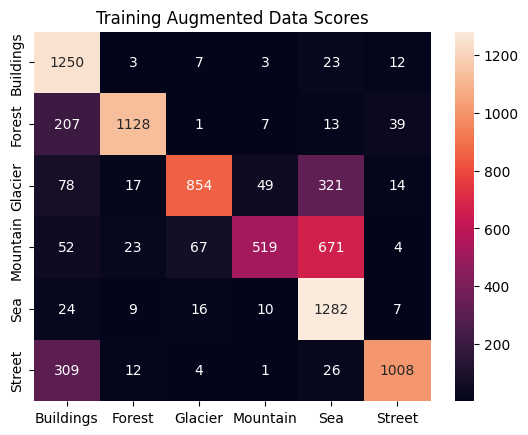

tf.Tensor(
[[1250    3    7    3   23   12]
 [ 207 1128    1    7   13   39]
 [  78   17  854   49  321   14]
 [  52   23   67  519  671    4]
 [  24    9   16   10 1282    7]
 [ 309   12    4    1   26 1008]], shape=(6, 6), dtype=int32)
0.7485749690210657


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

modelResults = model.predict(X_train)
modelResults_ = np.argmax(modelResults, axis=1)
cm = tf.math.confusion_matrix(y_train, modelResults_)

classes = ['Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street']
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
ax.set_title('Training Augmented Data Scores')
plt.show()

print(cm)
print(sum(modelResults_ == y_train)/len(y_train))

- Here we used test data from the original training folder, but we did not use this in the training step.

In [ ]:
###  LOADING THE MODEL FOR THE TEST DATA
import numpy as np
import pandas as pd
import tensorflow as tf

X_test = np.load("X_test.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)

X_test = X_test.reshape(X_test.shape[0],150,150,1)
print(X_test.shape)



(2250, 150, 150, 1)


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('model5_1conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_10epoch.h5')
model.load_weights('model5_1conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_10epoch_weights.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 48)      480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 48)        20784     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        27712     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
modelResults = model.predict(X_test)

modelResults_ = np.argmax(modelResults, axis=1)
cm = tf.math.confusion_matrix(y_test, modelResults_)
print(cm)

import seaborn as sns
classes = ['Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)


print(sum(modelResults_ == y_test)/len(y_test))

71/71 [==============================] - 28s 395ms/step
tf.Tensor(
[[336   4   1   5   9  27]
 [ 10 334   1   6   1   9]
 [ 17  11 181 102  58   6]
 [ 15   1  23 293  39   5]
 [ 19  11   7  37 304   2]
 [114   4   0   2   6 250]], shape=(6, 6), dtype=int32)
0.7546666666666667


### Testing on Real Test Data 

- Here we do the same data preprocessing that we did on the training data before using them to evaluate the model.


In [ ]:
!pip install imageio
!pip install scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 41.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 111.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 46.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


- Getting the directory list of the images

In [ ]:
import re
import os 
import PIL
import PIL.Image
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from skimage import data, color
from skimage.transform import rescale, resize


def get_sort_dir(path):
    sample = os.listdir(path)
    num_sample = np.array(list(map(lambda x: re.findall(r'\d+', x), sample)))
    int_sample = list(map(lambda x: int(x), num_sample))
    int_sample = list(np.sort(int_sample))   
    new_list = list(map(lambda x: path + '/' + str(x)+'.jpg', int_sample))
    return new_list

buildings_dir = "test/buildings"
forest_dir = "test/forest"
glacier_dir = "test/glacier"
mountain_dir = "test/mountain"
sea_dir = "test/sea"
street_dir = "test/street"

buildings_path = list()
forest_path = list()
glacier_path = list()
mountain_path = list()
sea_path = list()
street_path = list()

buildings_path = get_sort_dir(buildings_dir)
forest_path = get_sort_dir(forest_dir)
glacier_path = get_sort_dir(glacier_dir)
mountain_path = get_sort_dir(mountain_dir)
sea_path = get_sort_dir(sea_dir)
street_path = get_sort_dir(street_dir)

- Preprocessing steps for the building test data

437
437
(150, 150, 3)
(437, 150, 150)
(150, 150)
Type:  <class 'numpy.ndarray'>
(437, 150, 150)


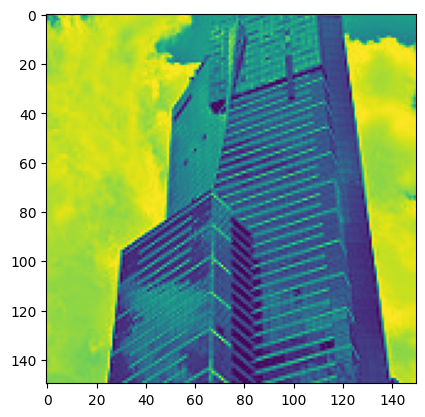

In [ ]:
## BUILDINGS DATA
import re
import os 
import PIL
import PIL.Image
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from skimage import data, color
from skimage.transform import rescale, resize

buildings_dimensions = list()
buildings_images = list()
for i in range(len(buildings_path)):
    image = mpimg.imread(buildings_path[i])
    dim = np.array(image).shape
    buildings_dimensions.append(dim)    
    buildings_images.append(np.array(image))
buildings_dim_count = pd.DataFrame(pd.value_counts(buildings_dimensions), columns=['count'])
buildings_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), buildings_dimensions))
print(sum(np.array(buildings_dim_) >= 150)) 
buildings_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), buildings_dimensions))
print(sum(np.array(buildings_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_buildings = np.array(buildings_images)[np.array(buildings_dim_) >= 150]
print(new_buildings[0].shape)

resized_buildings = []
for image in new_buildings:
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150,150), anti_aliasing=True)
    resized_buildings.append(resized_image)
resized_buildings = np.array(resized_buildings)
print(resized_buildings.shape)

print(resized_buildings[0].shape)
print("Type: ", type(resized_buildings[0]))

new_buildings_data = []
for i in range(len(resized_buildings)):   # We used count of buildings since it is the smallest data set   
    new_buildings_data.append(resized_buildings[i])
new_buildings_data = np.array(new_buildings_data)    
print(new_buildings_data.shape)
plt.imshow(new_buildings_data[0])
plt.show()


- Preprocessing steps for the forest test data

473
(150, 150, 3)
/tmp/ipykernel_41/806289406.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_forest = np.array(forest_images)[np.array(forest_dim_) >= 150]
(473, 150, 150)


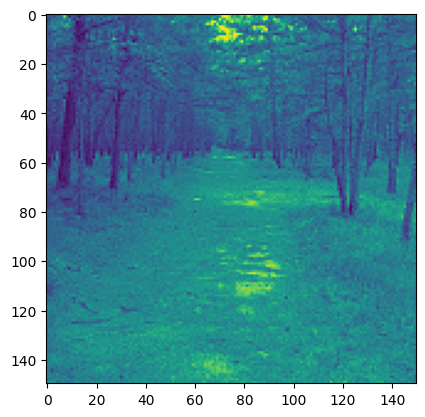

In [ ]:
## FOREST DATA

forest_dimensions = list()
forest_images = list()
for i in range(len(forest_path)):
    image = mpimg.imread(forest_path[i])
    dim = np.array(image).shape
    forest_dimensions.append(dim)    
    forest_images.append(np.array(image))
forest_dim_count = pd.DataFrame(pd.value_counts(forest_dimensions), columns=['count'])
forest_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), forest_dimensions))
print(sum(np.array(forest_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_forest = np.array(forest_images)[np.array(forest_dim_) >= 150]
print(new_forest[0].shape)

resized_forest = new_forest.copy()
i=0
for image in new_forest:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_forest[i] = resized_image
    i += 1    

new_forest_data = []
for i in range(len(resized_forest)):   # We used count of buildings since it is the smallest data set   
    new_forest_data.append(resized_forest[i])
new_forest_data = np.array(new_forest_data)    
print(new_forest_data.shape)
plt.imshow(new_forest_data[0])
plt.show()

- Preprocessing steps for the glacier test data

548
(150, 150, 3)
/tmp/ipykernel_41/4272048275.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_glacier = np.array(glacier_images)[np.array(glacier_dim_) >= 150]
(548, 150, 150)
(548, 150, 150)


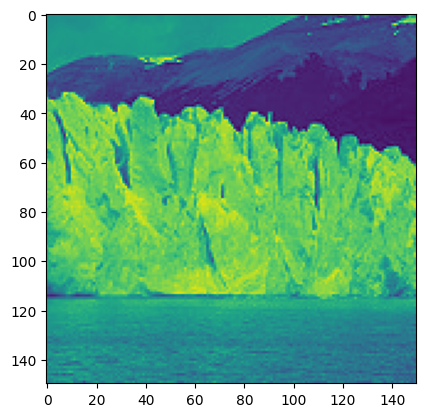

In [ ]:
## GLACIER DATA

glacier_dimensions = list()
glacier_images = list()
for i in range(len(glacier_path)):
    image = mpimg.imread(glacier_path[i])
    dim = np.array(image).shape
    glacier_dimensions.append(dim)    
    glacier_images.append(np.array(image))
glacier_dim_count = pd.DataFrame(pd.value_counts(glacier_dimensions), columns=['count'])
glacier_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), glacier_dimensions))
print(sum(np.array(glacier_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_glacier = np.array(glacier_images)[np.array(glacier_dim_) >= 150]
print(new_glacier[0].shape)

resized_glacier = new_glacier.copy()
i=0
for image in new_glacier:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_glacier[i] = resized_image
    i += 1   

new_glacier_data = []
for i in range(len(resized_glacier)):   # We used count of buildings since it is the smallest data set   
    new_glacier_data.append(resized_glacier[i])
new_glacier_data = np.array(new_glacier_data)    
print(new_glacier_data.shape)

print(new_glacier_data.shape)
plt.imshow(new_glacier_data[0])
plt.show()

- Preprocessing steps for the mountain test data

523
(150, 150, 3)
/tmp/ipykernel_41/2615811140.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_mountain = np.array(mountain_images)[np.array(mountain_dim_) >= 150]
(523, 150, 150)
(523, 150, 150)


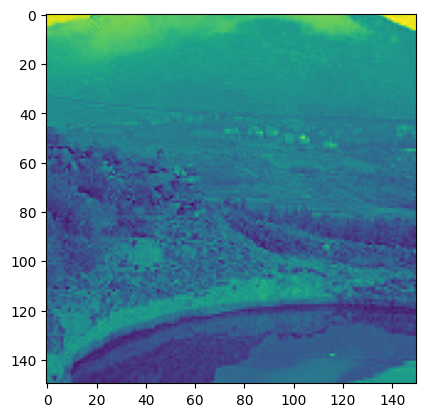

In [ ]:
## MOUNTAIN DATA

mountain_dimensions = list()
mountain_images = list()
for i in range(len(mountain_path)):
    image = mpimg.imread(mountain_path[i])
    dim = np.array(image).shape
    mountain_dimensions.append(dim)    
    mountain_images.append(np.array(image))
mountain_dim_count = pd.DataFrame(pd.value_counts(mountain_dimensions), columns=['count'])
mountain_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), mountain_dimensions))
print(sum(np.array(mountain_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_mountain = np.array(mountain_images)[np.array(mountain_dim_) >= 150]
print(new_mountain[0].shape)

resized_mountain = new_mountain.copy()
i=0
for image in new_mountain:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_mountain[i] = resized_image
    i += 1  

new_mountain_data = []
for i in range(len(resized_mountain)):   # We used count of buildings since it is the smallest data set   
    new_mountain_data.append(resized_mountain[i])
new_mountain_data = np.array(new_mountain_data)    
print(new_mountain_data.shape)

print(new_mountain_data.shape)
plt.imshow(new_mountain_data[0])
plt.show()

- Preprocessing steps for the sea test data

510
(150, 150, 3)
(510, 150, 150)
(510, 150, 150)
(510, 150, 150)


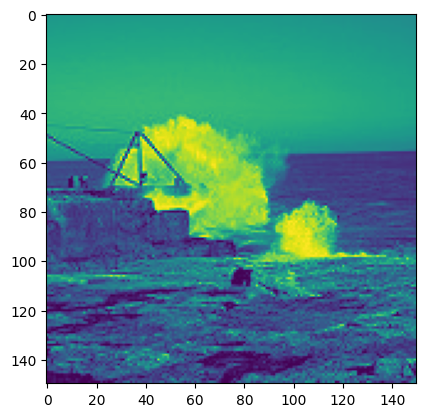

In [ ]:
## SEA DATA

sea_dimensions = list()
sea_images = list()
for i in range(len(sea_path)):
    image = mpimg.imread(sea_path[i])
    dim = np.array(image).shape
    sea_dimensions.append(dim)    
    sea_images.append(np.array(image))
sea_dim_count = pd.DataFrame(pd.value_counts(sea_dimensions), columns=['count'])
sea_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), sea_dimensions))
print(sum(np.array(sea_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_sea = np.array(sea_images)[np.array(sea_dim_) >= 150]
print(new_sea[0].shape)

resized_sea = []
for image in new_sea:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_sea.append(resized_image)
resized_sea = np.array(resized_sea)    
print(resized_sea.shape)

new_sea_data = []
for i in range(len(resized_sea)):   # We used count of buildings since it is the smallest data set   
    new_sea_data.append(resized_sea[i])
new_sea_data = np.array(new_sea_data)    
print(new_sea_data.shape)

print(new_sea_data.shape)
plt.imshow(new_sea_data[0])
plt.show()

- Preprocessing steps for the street test data

501
(150, 150, 3)
(501, 150, 150)
(501, 150, 150)
(501, 150, 150)


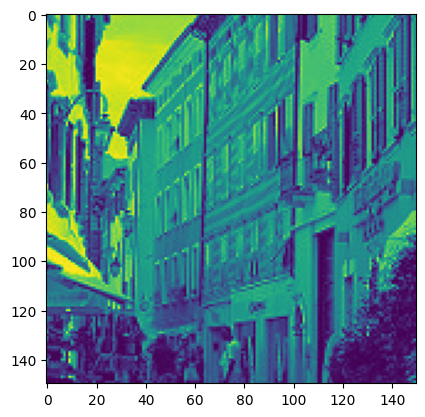

In [ ]:
## STREET DATA

street_dimensions = list()
street_images = list()
for i in range(len(street_path)):
    image = mpimg.imread(street_path[i])
    dim = np.array(image).shape
    street_dimensions.append(dim)    
    street_images.append(np.array(image))
street_dim_count = pd.DataFrame(pd.value_counts(street_dimensions), columns=['count'])
street_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), street_dimensions))
print(sum(np.array(street_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_street = np.array(street_images)[np.array(street_dim_) >= 150]
print(new_street[0].shape)

resized_street = []
for image in new_street:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_street.append(resized_image)
resized_street = np.array(resized_street)    
print(resized_street.shape)


new_street_data = []
for i in range(len(resized_street)):   # We used count of buildings since it is the smallest data set   
    new_street_data.append(resized_street[i])
new_street_data = np.array(new_street_data)    
print(new_street_data.shape)

print(new_street_data.shape)
plt.imshow(new_street_data[0])
plt.show()

- Stacking the data into a single numpy array

In [ ]:
final_data = np.vstack((new_buildings_data, new_forest_data, new_glacier_data, new_mountain_data, new_sea_data, new_street_data))
print(new_buildings_data.shape)
print(new_forest_data.shape)
print(new_glacier_data.shape)
print(new_mountain_data.shape)
print(new_sea_data.shape)
print(new_street_data.shape)


(437, 150, 150)
(473, 150, 150)
(548, 150, 150)
(523, 150, 150)
(510, 150, 150)
(501, 150, 150)


- Creating the label data for the test image data

In [ ]:
buildings_label = np.zeros(new_buildings.shape[0])
forest_label = np.ones(new_forest_data.shape[0])
glacier_label = np.empty(new_glacier_data.shape[0])
mountain_label = np.empty(new_mountain_data.shape[0])
sea_label = np.empty(new_sea_data.shape[0])
street_label = np.empty(new_street_data.shape[0])

glacier_label.fill(2)
mountain_label.fill(3)
sea_label.fill(4)
street_label.fill(5)

final_labels = np.concatenate((buildings_label, forest_label, glacier_label, mountain_label, sea_label, street_label))
print(buildings_label.shape)
print(forest_label.shape)
print(glacier_label.shape)
print(mountain_label.shape)
print(sea_label.shape)
print(street_label.shape)

print(final_labels.shape)


(437,)
(473,)
(548,)
(523,)
(510,)
(501,)
(2992,)


- Saving the final test data and labels

In [ ]:
np.save('final_data.npy', final_data)
np.save('final_labels.npy', final_labels)

- Calling the data 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

final_data = np.load('final_data.npy', allow_pickle=True)
final_labels = np.load('final_labels.npy', allow_pickle=True)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model8_1conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_10epoch.h5")
model.load_weights("model8_1conv48_1conv48_1conv64_1conv48_4Max_1Dense125_1Dense64_1Dropout_10epoch_weights.h5")
model.summary()


2023-12-09 00:32:04.779451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-09 00:32:05.063185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-09 00:32:05.063216: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-09 00:32:05.123634: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-09 00:32:08.529798: W tensorflow/stream_executor/platform/de

- Model evaluation on the best model using the test data. 

2023-12-09 00:33:06.020331: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 269280000 exceeds 10% of free system memory.
94/94 [==============================] - 225s 2s/step


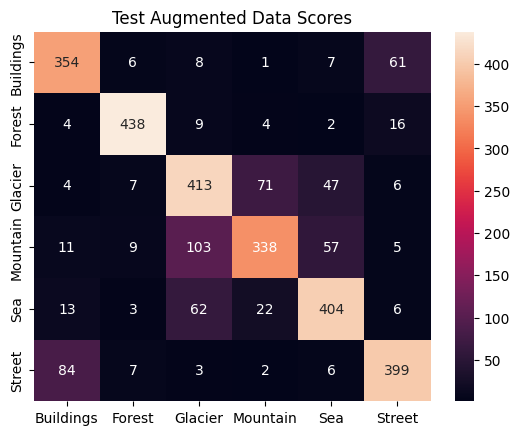

tf.Tensor(
[[354   6   8   1   7  61]
 [  4 438   9   4   2  16]
 [  4   7 413  71  47   6]
 [ 11   9 103 338  57   5]
 [ 13   3  62  22 404   6]
 [ 84   7   3   2   6 399]], shape=(6, 6), dtype=int32)
0.7840909090909091


In [ ]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

modelResult = model.predict(final_data)
modelResults_ = np.argmax(modelResult, axis=1)
cm = tf.math.confusion_matrix(final_labels, modelResults_)

classes = ['Buildings', 'Forest', 'Glacier', 'Mountain', 'Sea', 'Street']
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
ax.set_title('Test Augmented Data Scores')
plt.show()

print(cm)
print(sum(modelResults_ == final_labels)/len(final_labels))

In [ ]:
from operator import truediv
import numpy as np

tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [0.7531914893617021, 0.9319148936170213, 0.6906354515050167, 0.771689497716895, 0.7724665391969407, 0.8093306288032455]
Recall: [0.8100686498855835, 0.9260042283298098, 0.7536496350364964, 0.6462715105162524, 0.792156862745098, 0.7964071856287425]


### Issues / Improvements

    1. Use of better regularization and more tunning.
    2. Use cross-validation .
    3. Some sort of grid search method that would not take too much time to compute.
    4. Use 3-dimentional data 

### References

* Online: 
    * https://stackoverflow.com/questions/40729875/calculate-precision-and-recall-in-a-confusion-matrix
    * https://stackoverflow.com/questions/60766184/python-finding-the-most-used-colour-in-an-image-script-seems-to-find-inaccur#:~:text=Incidentally%2C%20PIL%20has%20a%20method%20for%20counting%20unique,%28maxcolors%3D2%2A%2A16%29%2C%20key%3Dlambda%20t%3A%20t%2C%20reverse%3DTrue%29%20%5B0%3A3%5D%20print%20%28most_common%29
    * https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy

### End of Project

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22621d3f-1aef-4d62-8a06-efeb53490e25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>